# Image Thresholding

## Global Thresholding

In [ ]:
!wget -O /content/sunflower.jpg 'https://images.unsplash.com/photo-1503936380431-4a4ce0fc296c?ixlib=rb4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2970&q=80'

--2024-04-06 21:46:37--  https://images.unsplash.com/photo-1503936380431-4a4ce0fc296c?ixlib=rb4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2970&q=80
Resolving images.unsplash.com (images.unsplash.com)... 151.101.2.208, 151.101.66.208, 151.101.130.208, ...
Connecting to images.unsplash.com (images.unsplash.com)|151.101.2.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 333654 (326K) [image/jpeg]
Saving to: ‘/content/sunflower.jpg’

/content/sunflower. 100%[===================>] 325.83K  --.-KB/s    in 0.01s   

2024-04-06 21:46:37 (24.6 MB/s) - ‘/content/sunflower.jpg’ saved [333654/333654]



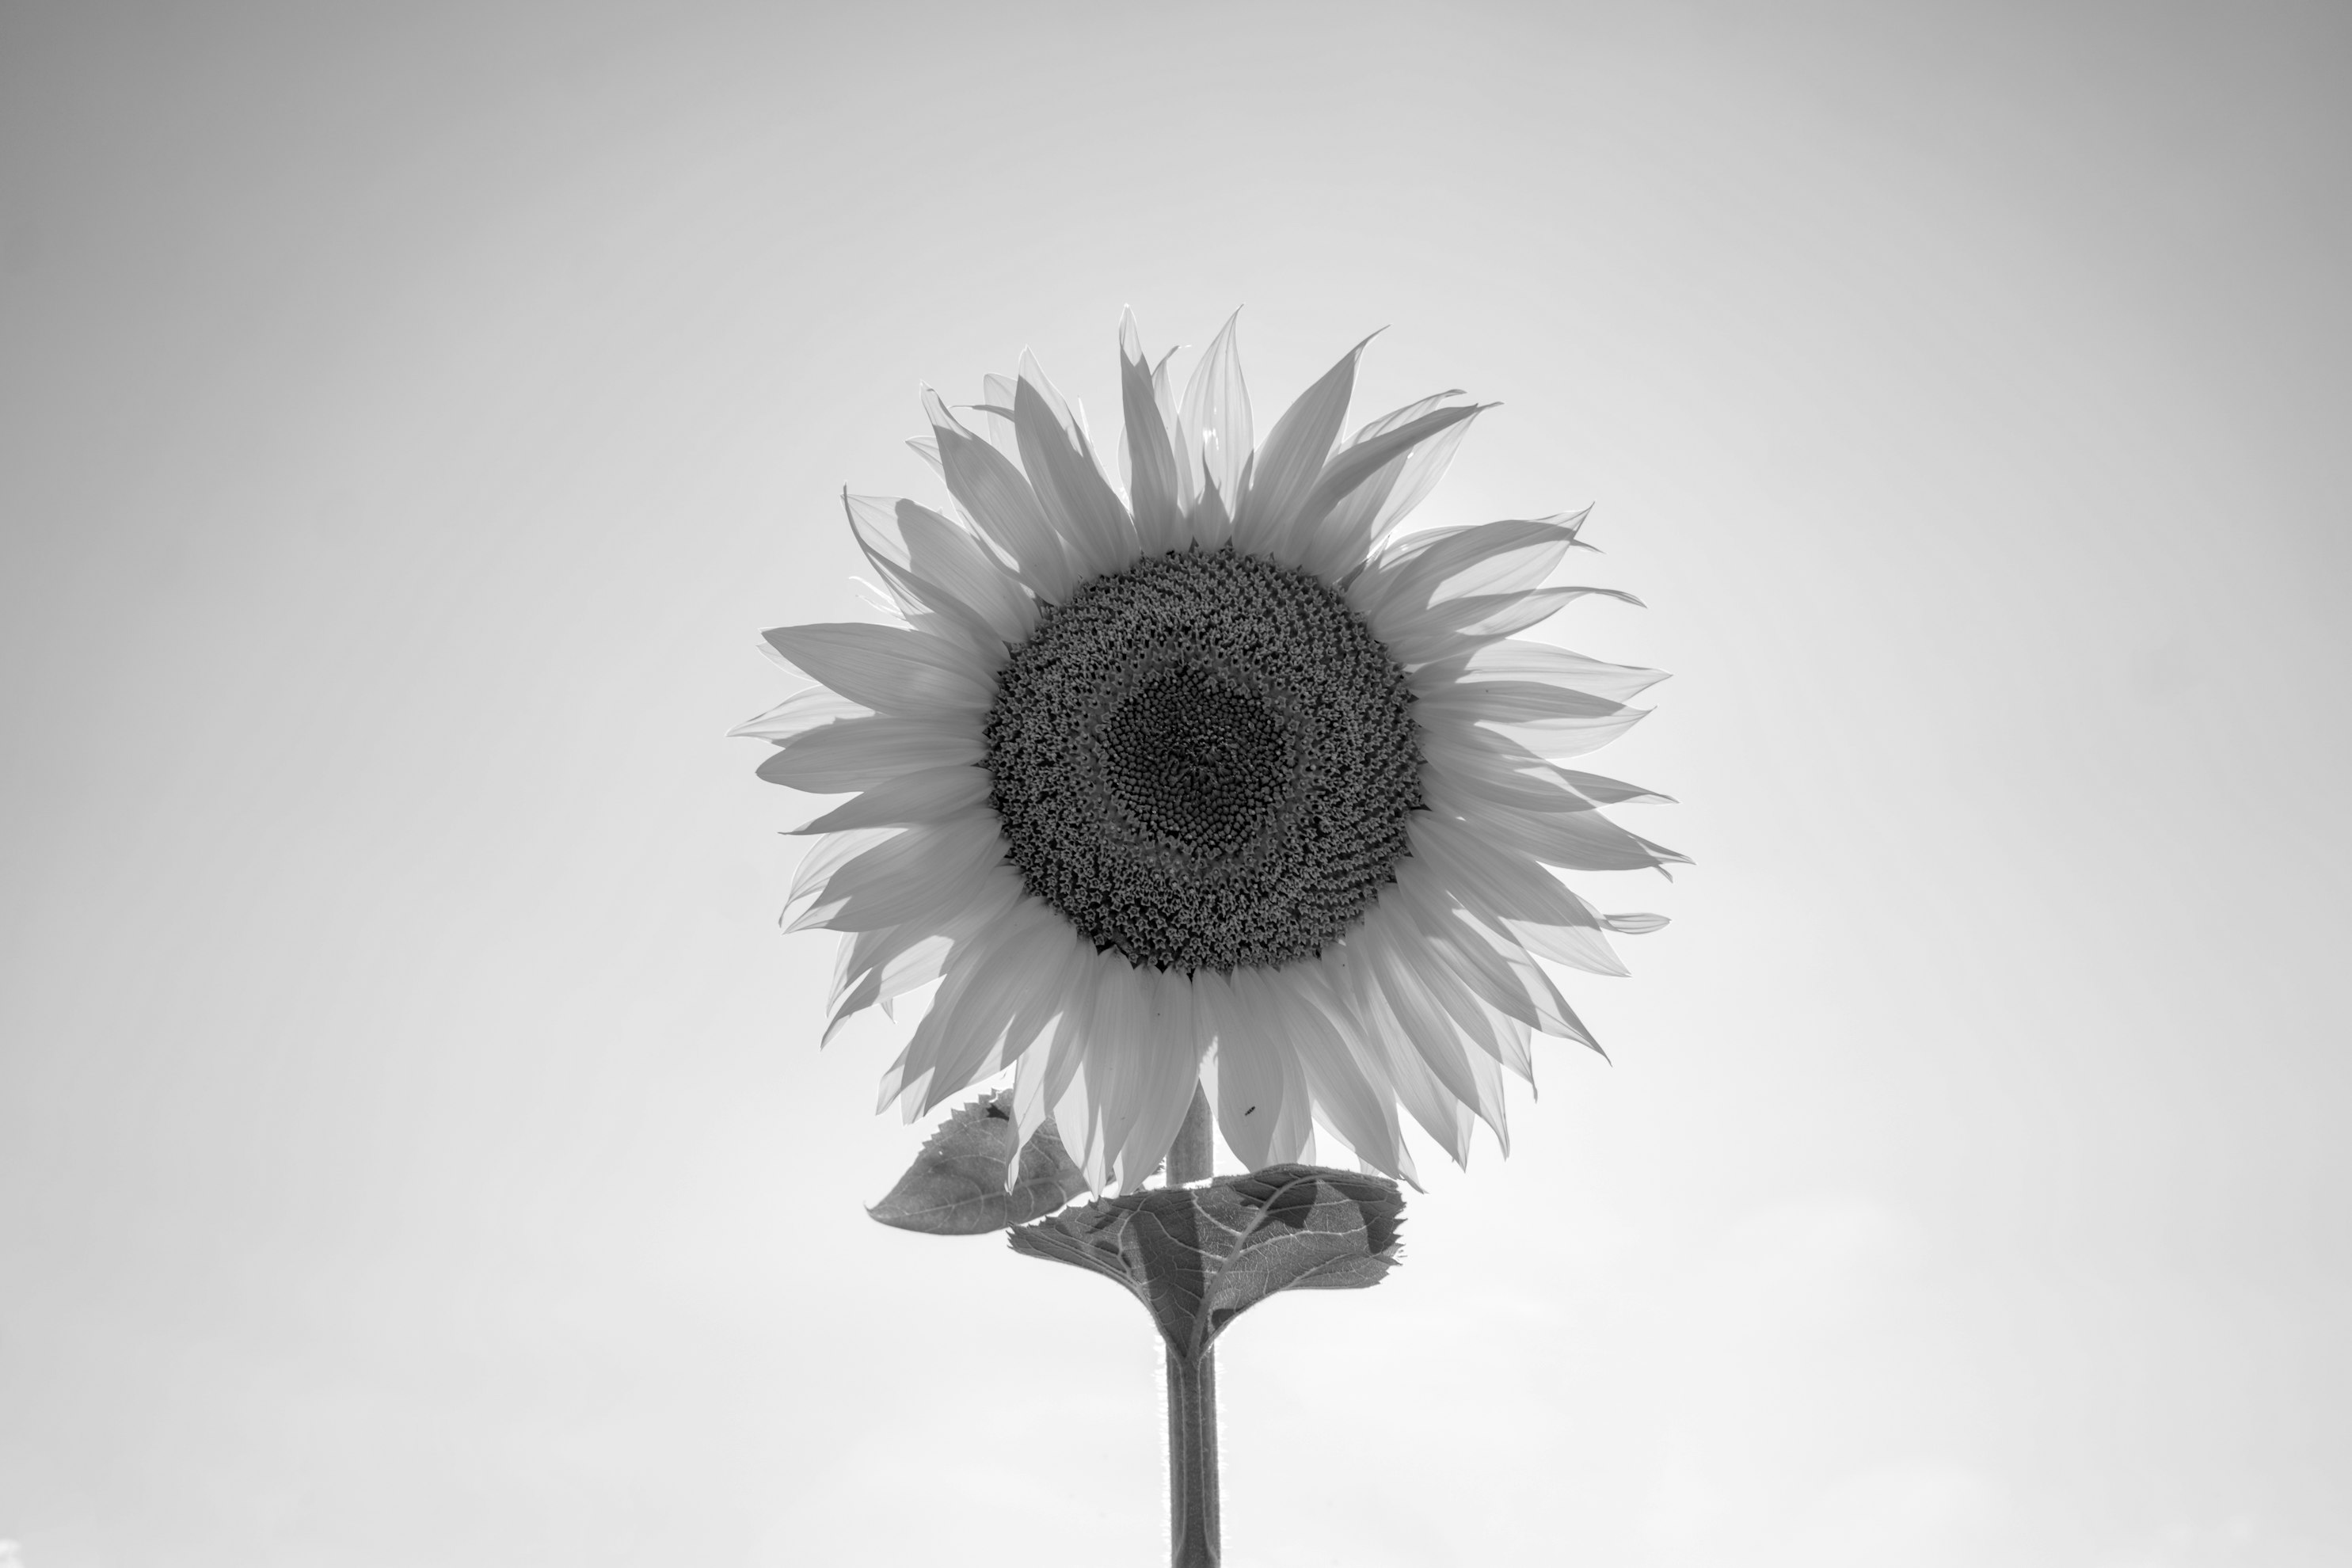

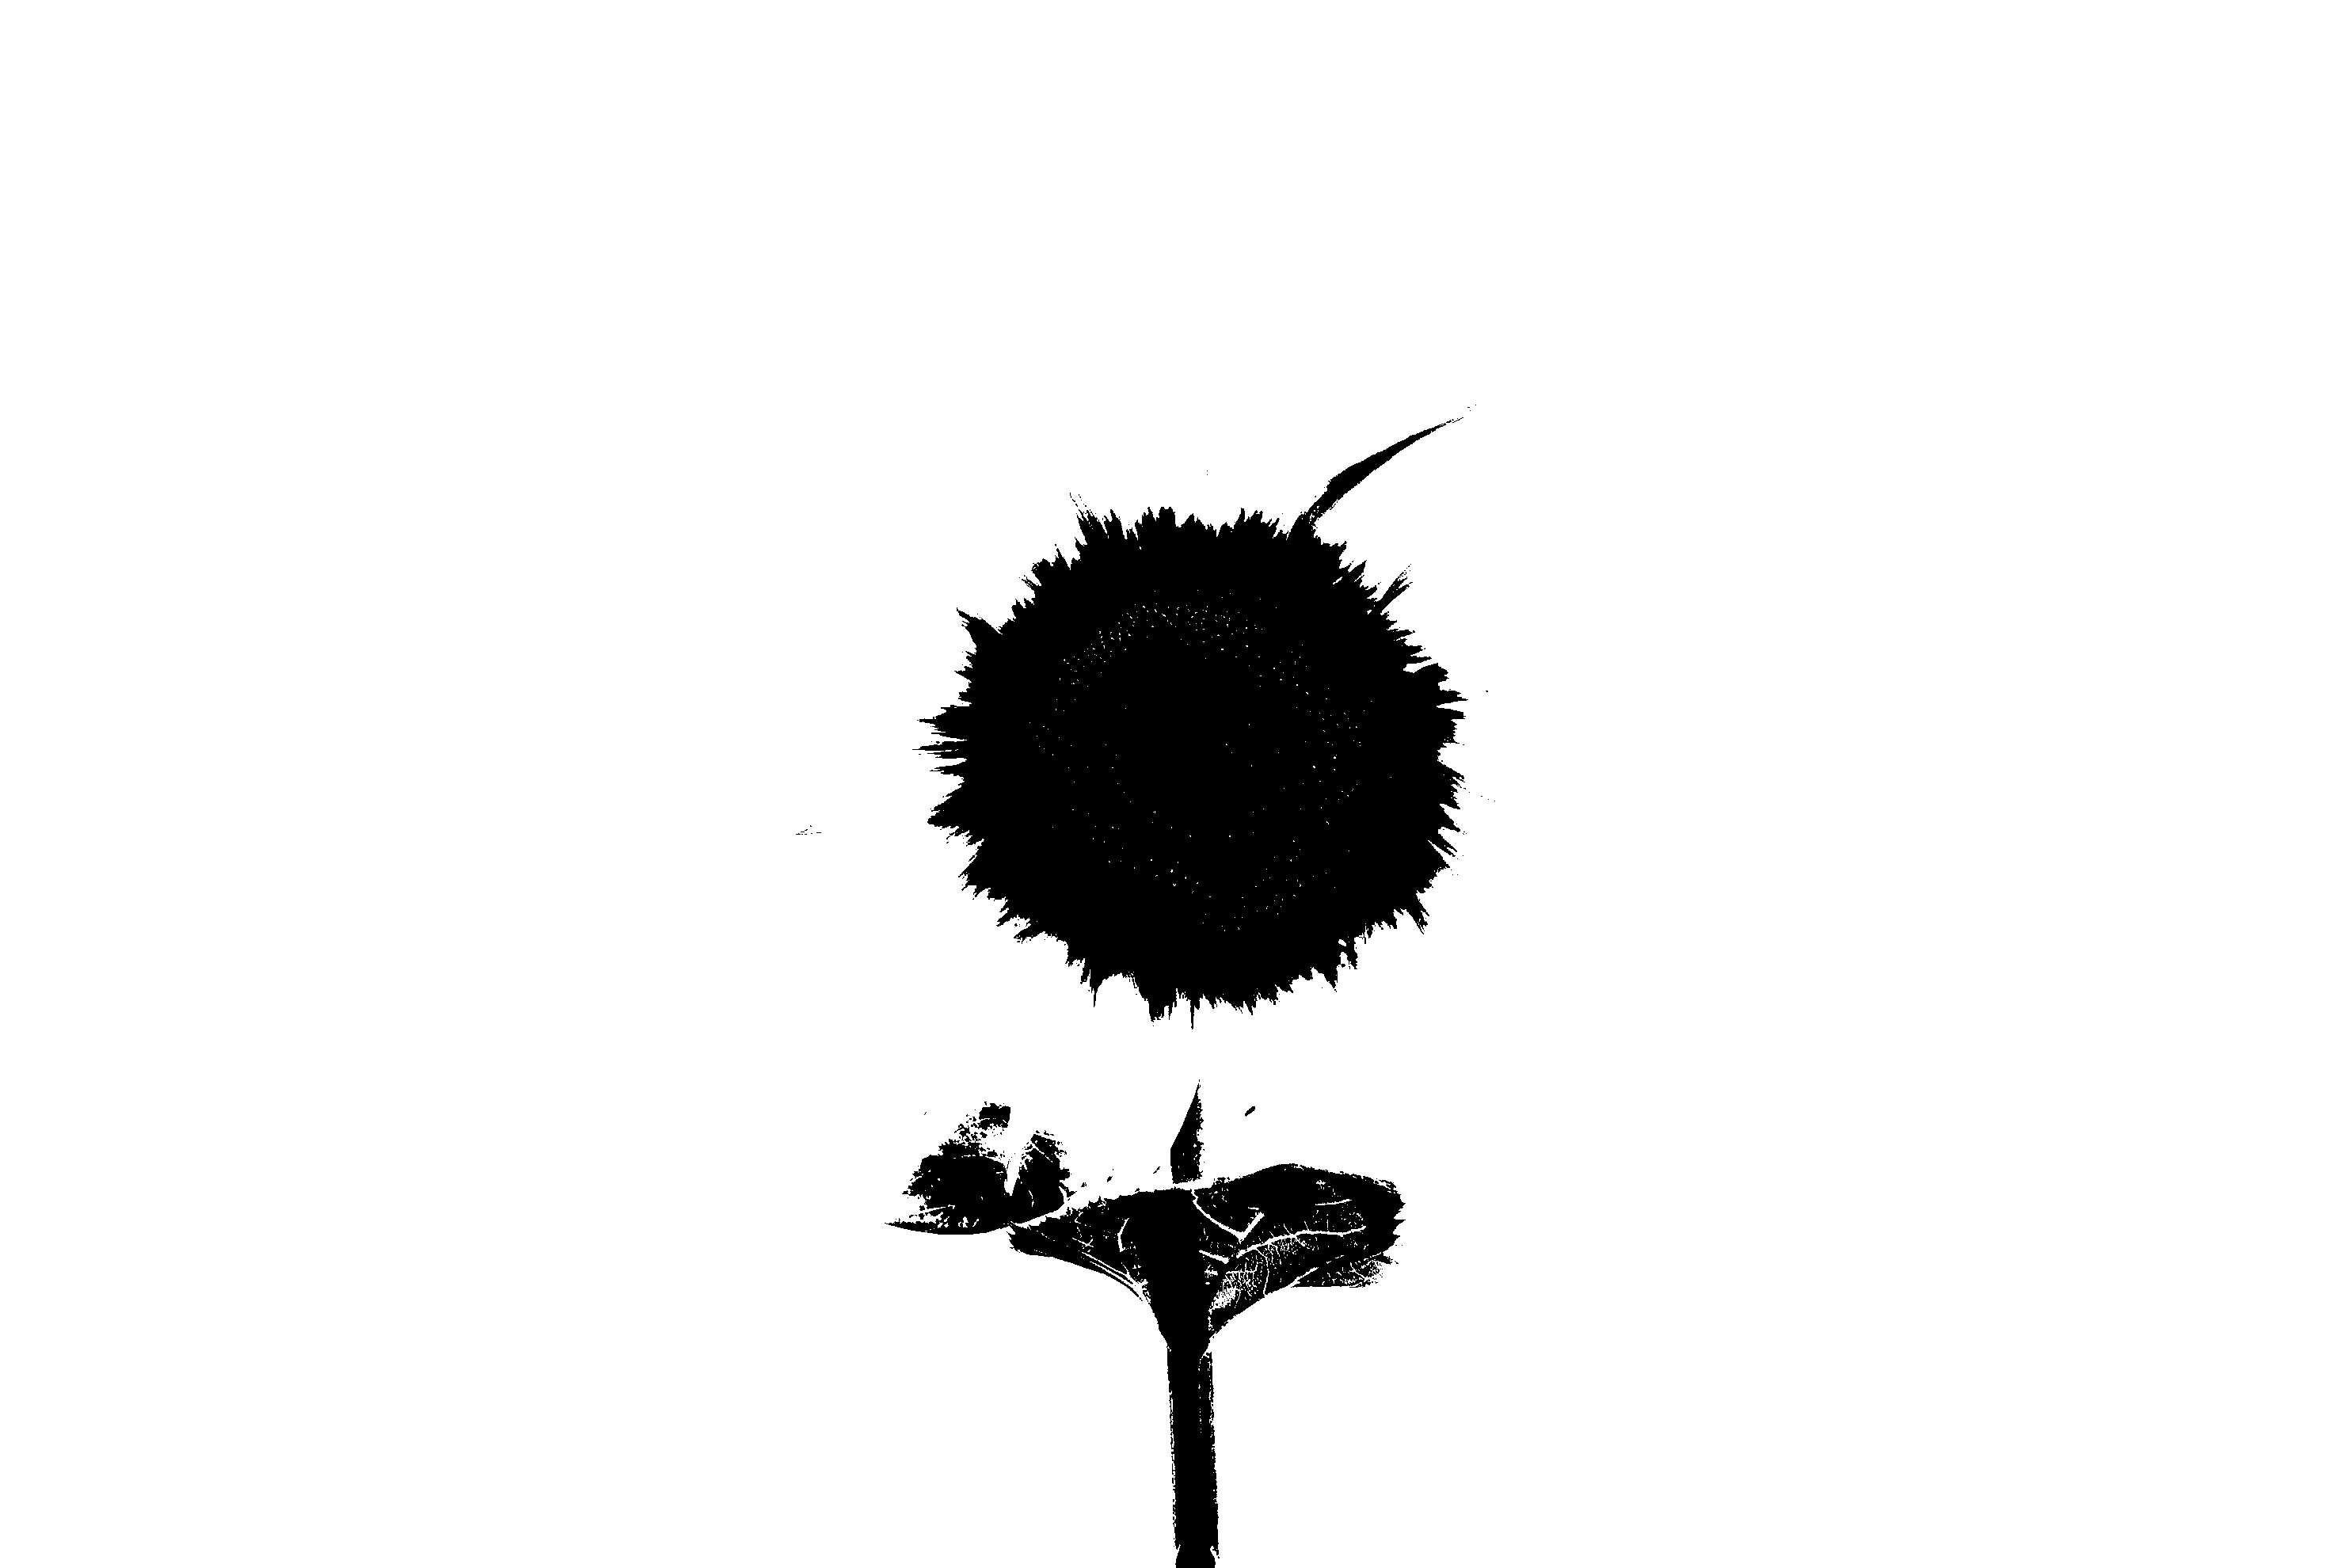

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/sunflower.jpg', cv2.IMREAD_GRAYSCALE)

# Apply global thresholding
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

cv2_imshow(image)
cv2_imshow(binary_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Otsu's Thresholding

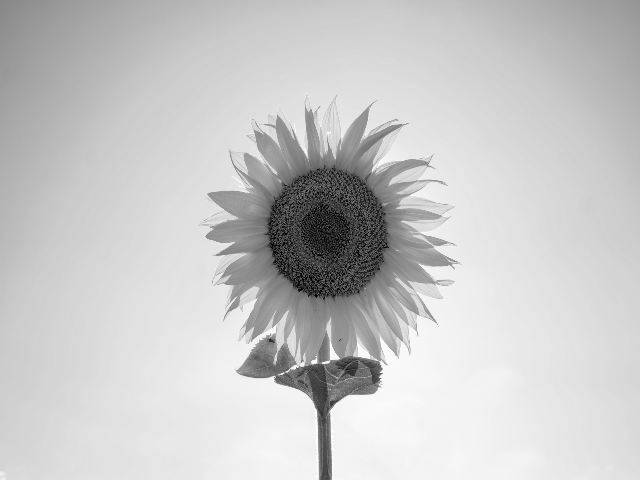

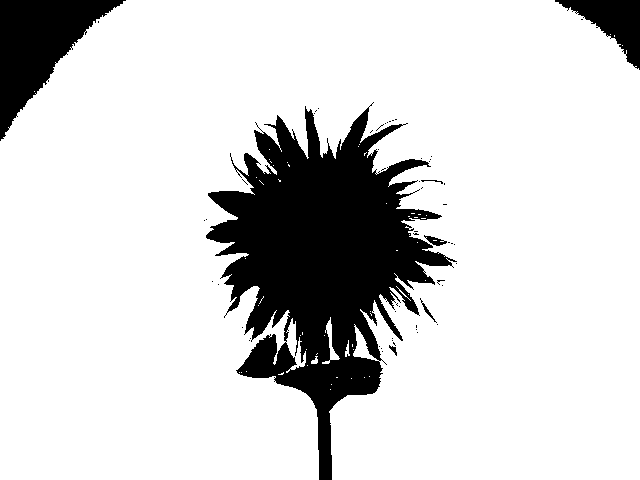

In [ ]:
image = cv2.imread('/content/sunflower.jpg', cv2.IMREAD_GRAYSCALE)

desired_width = 640
desired_height = 480

resized_image = cv2.resize(image, (desired_width, desired_height))

# Apply Otsu's thresholding
_, binary_image = cv2.threshold(resized_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(resized_image)
cv2_imshow(binary_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Global Thresholding Value in Python using Otsu’s Method

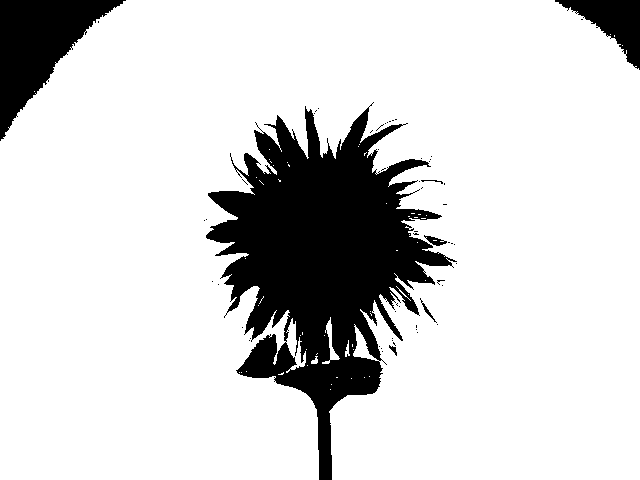

Global Threshold Value: 168.0


In [ ]:
image = cv2.imread('/content/sunflower.jpg', cv2.IMREAD_GRAYSCALE)

desired_width = 640
desired_height = 480

resized_image = cv2.resize(image, (desired_width, desired_height))
_, global_thresholded = cv2.threshold(resized_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
otsu_threshold_value = cv2.threshold(resized_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[0]

cv2_imshow(global_thresholded)
print("Global Threshold Value:", otsu_threshold_value)
cv2.waitKey(0)
cv2.destroyAllWindows()

<ipython-input-5-c87aa7315724>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])


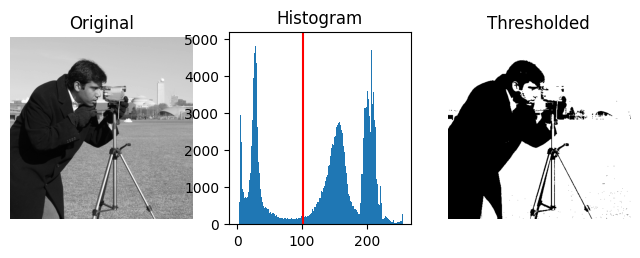

In [ ]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu
image = data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

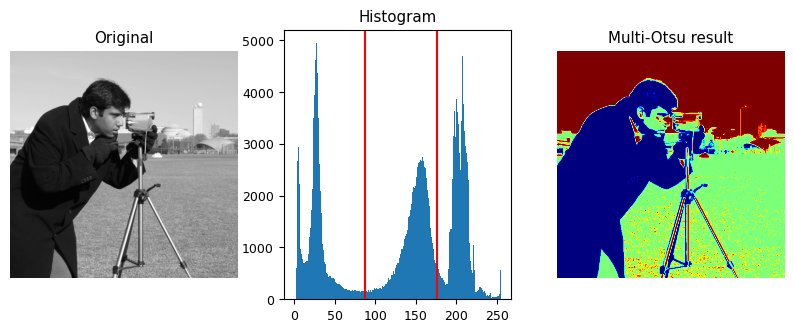

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data
from skimage.filters import threshold_multiotsu

matplotlib.rcParams['font.size'] = 9
image = data.camera()
thresholds = threshold_multiotsu(image)
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

# Region Growing with Watershed Thresholding

In [ ]:
from matplotlib import pyplot as plt
%matplotlib notebook
import numpy as np
from skimage.io import imread,imsave

(800, 1200, 3)


<IPython.core.display.Javascript object>


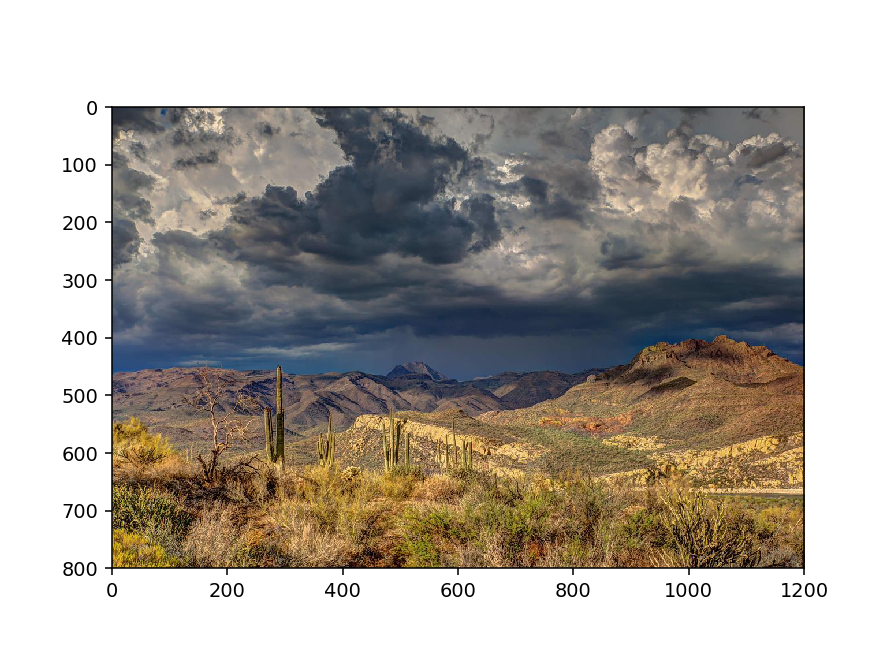

In [ ]:
im = imread('desert.jpg')
print(im.shape)

plt.figure()
plt.imshow(im)
plt.show()

<IPython.core.display.Javascript object>


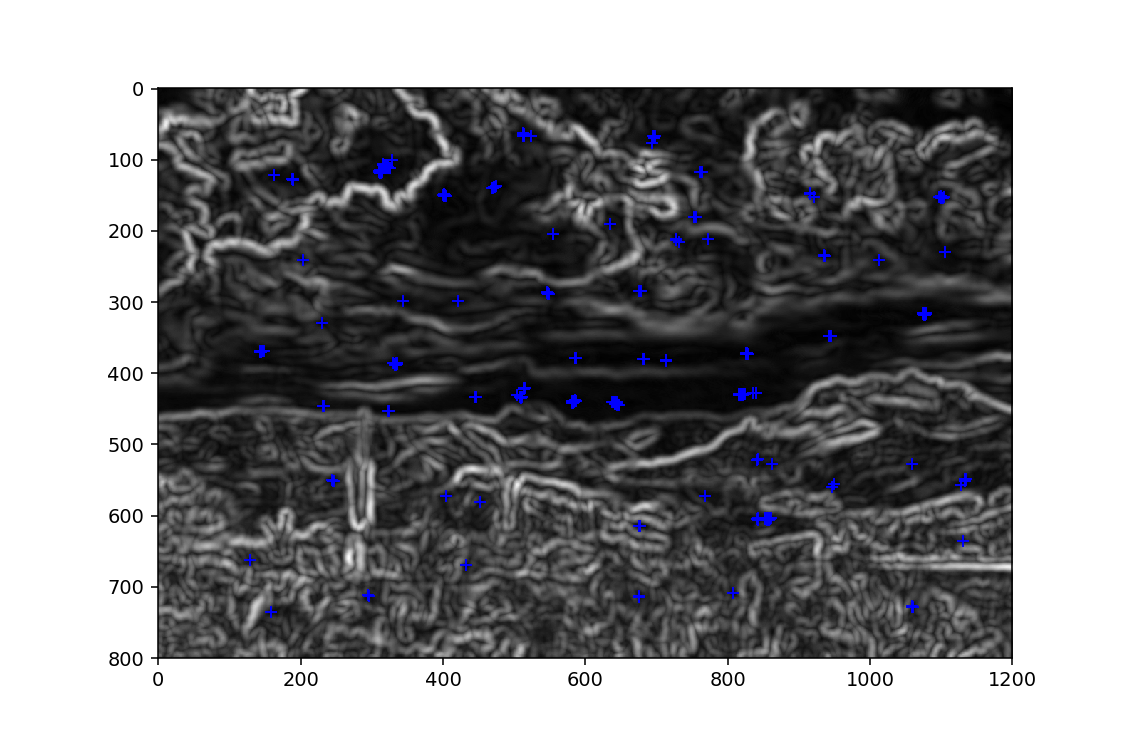

In [ ]:
from skimage.filters import rank,gaussian
from skimage.morphology import disk
from skimage.feature import peak_local_max

def get_markers(im, indices=False):
    im_ = gaussian(im, sigma=4)
    gradr = rank.gradient(im_[:,:,0],disk(5)).astype('int')
    gradg = rank.gradient(im_[:,:,1],disk(5)).astype('int')
    gradb = rank.gradient(im_[:,:,2],disk(5)).astype('int')
    grad = gradr+gradg+gradb

    return peak_local_max(grad.max()-grad,threshold_rel=0.5, min_distance=60,indices=indices),grad

markers,grad = get_markers(im, True)
plt.figure()
plt.imshow(grad, cmap=plt.cm.gray)
plt.plot(markers[:,1],markers[:,0],'b+')
plt.show()

<IPython.core.display.Javascript object>


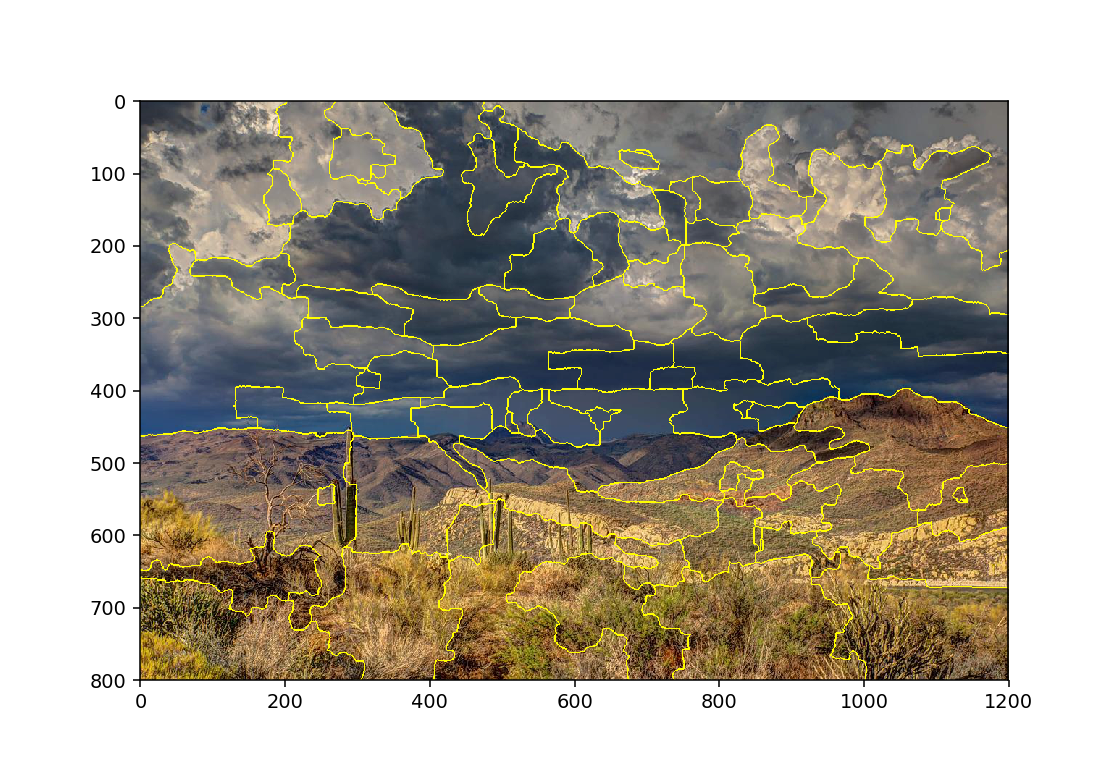

<IPython.core.display.Javascript object>


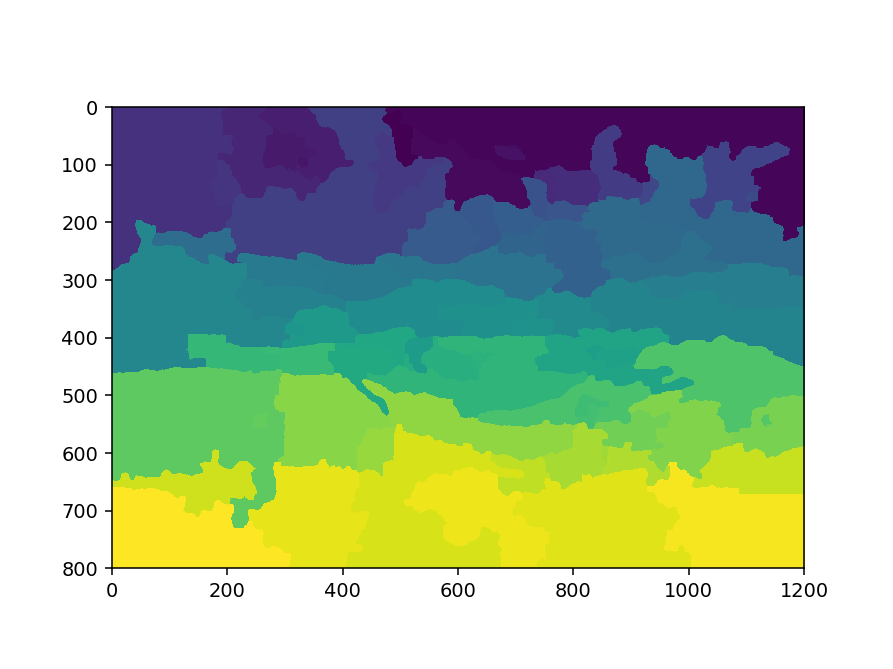

In [ ]:
from skimage.morphology import watershed
from skimage.segmentation import mark_boundaries
from skimage.measure import label

markers, grad = get_markers(im, False)
markers = label(markers)
ws = watershed(grad, markers)

plt.figure()
plt.imshow(mark_boundaries(im,ws))
plt.figure()
plt.imshow(ws)
plt.show()

# Skeletanization

+ skeletonize - works by making successive passes of the image, removing pixels on object borders. This continues until no more pixels can be removed.

+ skeletonize_3d - uses an octree data structure to examine a 3x3x3 neighborhood of a pixel. The algorithm proceeds by iteratively sweeping over the image, and removing pixels at each iteration until the image stops changing

+ Medial axis skeletonization - The medial axis of an object is the set of all points having more than one closest point on the object’s boundary. It is often called the topological skeleton, because it is a 1-pixel wide skeleton of the object, with the same connectivity as the original object.

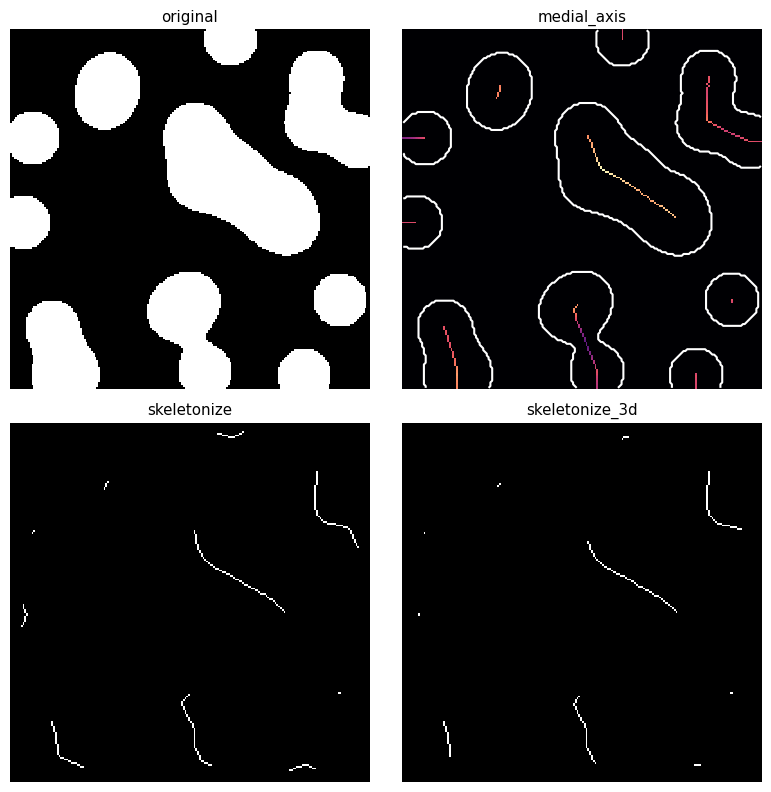

In [ ]:
from skimage.morphology import medial_axis, skeletonize, skeletonize_3d
from skimage.data import binary_blobs
data = binary_blobs(200, blob_size_fraction=.2, volume_fraction=.35, seed=1)
skel, distance = medial_axis(data, return_distance=True)
skeleton = skeletonize(data)
skeleton3d = skeletonize_3d(data)
dist_on_skel = distance * skel

fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box'})
ax = axes.ravel()

ax[0].imshow(data, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('original')
ax[0].axis('off')

ax[2].imshow(skeleton, cmap=plt.cm.gray, interpolation='nearest')
ax[2].set_title('skeletonize')
ax[2].axis('off')

ax[3].imshow(skeleton3d, cmap=plt.cm.gray, interpolation='nearest')
ax[3].set_title('skeletonize_3d')
ax[3].axis('off')

ax[1].imshow(dist_on_skel, cmap='magma', interpolation='nearest')
ax[1].contour(data, [0.5], colors='w')
ax[1].set_title('medial_axis')
ax[1].axis('off')

fig.tight_layout()
plt.show()